In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
#Download training datasets
dataset = MNIST(root='data/', download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST\raw\train-images-idx3-ubyte.gz to data/MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST\raw\train-labels-idx1-ubyte.gz to data/MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST\raw\t10k-images-idx3-ubyte.gz to data/MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST\raw\t10k-labels-idx1-ubyte.gz to data/MNIST\raw



In [3]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train

In [4]:
len(dataset)

60000

In [5]:
# Getting the test dataset:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [6]:
dataset[6]

(<PIL.Image.Image image mode=L size=28x28 at 0x1F36FD2DCA0>, 1)

Label: 1


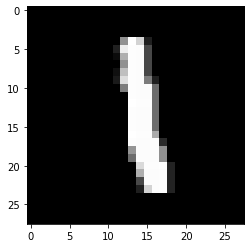

In [8]:
import matplotlib.pyplot as plt

image, label = dataset[6]
plt.imshow(image, cmap='gray')
print('Label:', label)

### Converting images to tensor:

In [9]:
import torchvision.transforms as transforms

In [10]:
dataset = MNIST(root='data/', train=True, transform=transforms.ToTensor())

In [12]:
img_tensor, label = dataset[6]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 1


### Splitting into training and validation set:

In [14]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
print(len(train_ds))
print(len(val_ds))

50000
10000


In [15]:
from torch.utils.data import DataLoader

batch_size = 128
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

## Logistics Model:

In [16]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [17]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0278, -0.0049,  0.0194,  ..., -0.0269, -0.0061, -0.0343],
        [-0.0182, -0.0277,  0.0290,  ..., -0.0029,  0.0130,  0.0065],
        [ 0.0339,  0.0304,  0.0195,  ..., -0.0312,  0.0119, -0.0038],
        ...,
        [-0.0309,  0.0295, -0.0229,  ..., -0.0108, -0.0268,  0.0045],
        [-0.0039,  0.0267,  0.0294,  ...,  0.0034,  0.0223, -0.0200],
        [ 0.0054,  0.0319,  0.0078,  ..., -0.0331, -0.0151, -0.0072]],
       requires_grad=True)

In [18]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0058, -0.0066, -0.0031,  0.0013, -0.0109, -0.0231,  0.0181,  0.0177,
        -0.0345, -0.0328], requires_grad=True)

In [19]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [21]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 1.9933e-01,  9.7561e-02, -5.1575e-02,  2.3070e-01, -1.2292e-02,
          3.6704e-01, -8.9957e-02,  2.6699e-02,  4.4462e-02,  1.3531e-01],
        [ 9.5959e-02,  1.3445e-01,  9.3047e-02,  7.8011e-02, -1.9961e-01,
         -6.9659e-05,  1.0537e-02,  1.1045e-01,  2.5615e-01,  1.3846e-01]])


### Applying the softmax function:

In [22]:
import torch.nn.functional as F

In [23]:
outputs[:2]

tensor([[ 1.9933e-01,  9.7561e-02, -5.1575e-02,  2.3070e-01, -1.2292e-02,
          3.6704e-01, -8.9957e-02,  2.6699e-02,  4.4462e-02,  1.3531e-01],
        [ 9.5959e-02,  1.3445e-01,  9.3047e-02,  7.8011e-02, -1.9961e-01,
         -6.9659e-05,  1.0537e-02,  1.1045e-01,  2.5615e-01,  1.3846e-01]],
       grad_fn=<SliceBackward0>)

In [24]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1100, 0.0994, 0.0856, 0.1135, 0.0890, 0.1301, 0.0824, 0.0926, 0.0942,
         0.1032],
        [0.1018, 0.1058, 0.1015, 0.1000, 0.0758, 0.0925, 0.0935, 0.1033, 0.1195,
         0.1062]])
Sum:  1.0


In [25]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([5, 8, 3, 3, 1, 1, 3, 3, 1, 1, 9, 5, 9, 9, 7, 3, 5, 6, 9, 1, 3, 3, 3, 4,
        0, 5, 1, 3, 3, 8, 3, 0, 9, 9, 1, 5, 9, 6, 9, 0, 3, 5, 3, 6, 9, 1, 0, 8,
        3, 0, 3, 9, 2, 5, 1, 3, 0, 6, 3, 5, 0, 2, 5, 0, 1, 3, 0, 3, 5, 9, 0, 9,
        1, 2, 1, 0, 0, 5, 5, 5, 0, 5, 0, 3, 3, 5, 5, 3, 5, 9, 9, 9, 3, 1, 1, 6,
        9, 0, 8, 3, 9, 8, 1, 5, 3, 3, 0, 3, 0, 8, 0, 5, 2, 5, 5, 9, 3, 8, 9, 5,
        9, 3, 9, 3, 9, 3, 3, 9])
tensor([0.1301, 0.1195, 0.1313, 0.1331, 0.1295, 0.1166, 0.1179, 0.1381, 0.1332,
        0.1120, 0.1244, 0.1328, 0.1170, 0.1344, 0.1238, 0.1252, 0.1391, 0.1228,
        0.1221, 0.1216, 0.1368, 0.1365, 0.1190, 0.1276, 0.1239, 0.1309, 0.1151,
        0.1115, 0.1292, 0.1240, 0.1397, 0.1284, 0.1461, 0.1343, 0.1184, 0.1334,
        0.1184, 0.1205, 0.1205, 0.1326, 0.1492, 0.1346, 0.1245, 0.1224, 0.1185,
        0.1195, 0.1198, 0.1093, 0.1510, 0.1392, 0.1407, 0.1243, 0.1199, 0.1213,
        0.1241, 0.1594, 0.1464, 0.1134, 0.1410, 0.1229, 0.1273, 0.1391, 0.1207,
       

In [26]:
labels

tensor([3, 3, 2, 3, 2, 4, 9, 9, 6, 5, 0, 8, 1, 8, 5, 3, 2, 1, 6, 2, 6, 6, 0, 7,
        3, 0, 1, 9, 8, 9, 6, 2, 7, 3, 5, 6, 8, 1, 8, 3, 2, 0, 7, 1, 1, 3, 8, 1,
        2, 2, 2, 1, 3, 2, 6, 6, 5, 1, 0, 8, 2, 8, 4, 4, 4, 6, 4, 4, 8, 6, 5, 9,
        6, 3, 6, 8, 4, 9, 4, 9, 9, 7, 9, 6, 5, 0, 3, 7, 9, 8, 1, 4, 6, 4, 8, 1,
        8, 3, 7, 7, 6, 9, 5, 2, 5, 4, 0, 9, 0, 8, 8, 4, 2, 0, 3, 7, 0, 4, 7, 0,
        3, 2, 9, 2, 1, 9, 2, 1])

### Evaluation Metrics and Loss Function:

In [27]:
torch.sum(preds == labels)

tensor(9)

In [28]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [29]:
accuracy(outputs, labels)

tensor(0.0703)

In [30]:
loss_fn = F.cross_entropy

In [31]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3297, grad_fn=<NllLossBackward0>)


Training the model
Now that we have defined the data loaders, model, loss function and optimizer, we are ready to train the model. The training process is identical to linear regression, with the addition of a "validation phase" to evaluate the model in each epoch. Here's what it looks like in pseudocode:

for epoch in range(num_epochs):
    # Training phase
    for batch in train_loader:
        # Generate predictions
        # Calculate loss
        # Compute gradients
        # Update weights
        # Reset gradients
    
    # Validation phase
    for batch in val_loader:
        # Generate predictions
        # Calculate loss
        # Calculate metrics (accuracy etc.)
    # Calculate average validation loss & metrics
    
    # Log epoch, loss & metrics for inspection

In [32]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [33]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [34]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3272953033447266, 'val_acc': 0.09266218543052673}

In [35]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9600, val_acc: 0.5863
Epoch [1], val_loss: 1.6878, val_acc: 0.7163
Epoch [2], val_loss: 1.4844, val_acc: 0.7594
Epoch [3], val_loss: 1.3310, val_acc: 0.7831
Epoch [4], val_loss: 1.2133, val_acc: 0.7977


In [36]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1211, val_acc: 0.8068
Epoch [1], val_loss: 1.0471, val_acc: 0.8146
Epoch [2], val_loss: 0.9868, val_acc: 0.8220
Epoch [3], val_loss: 0.9366, val_acc: 0.8254
Epoch [4], val_loss: 0.8942, val_acc: 0.8295


In [37]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8579, val_acc: 0.8326
Epoch [1], val_loss: 0.8265, val_acc: 0.8358
Epoch [2], val_loss: 0.7991, val_acc: 0.8392
Epoch [3], val_loss: 0.7748, val_acc: 0.8419
Epoch [4], val_loss: 0.7532, val_acc: 0.8438


In [38]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7339, val_acc: 0.8454
Epoch [1], val_loss: 0.7165, val_acc: 0.8469
Epoch [2], val_loss: 0.7006, val_acc: 0.8484
Epoch [3], val_loss: 0.6862, val_acc: 0.8505
Epoch [4], val_loss: 0.6729, val_acc: 0.8516


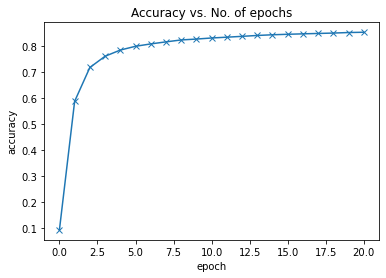

In [39]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

### Testing with Individual images:

In [40]:
test_dataset = MNIST(root='data/', train=False, transform=transforms.ToTensor())
len(test_dataset)

10000

torch.Size([1, 28, 28])
7


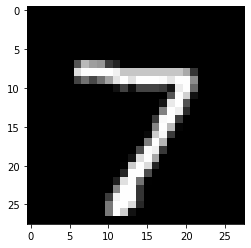

In [43]:
img_tensor, label = test_dataset[0]
plt.imshow(img_tensor[0], cmap='gray')
print(img_tensor.shape)
print(label)

In [44]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


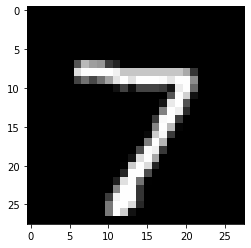

In [45]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


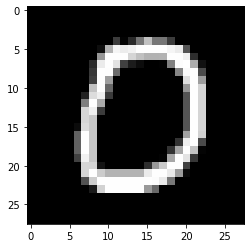

In [46]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 9


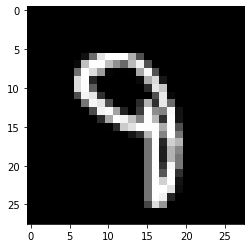

In [47]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 6 , Predicted: 6


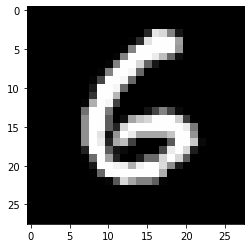

In [48]:
img, label = test_dataset[1831]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [49]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.6427549123764038, 'val_acc': 0.859375}

### Saving your model values(weights and bias):

In [51]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [52]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0031,  0.0112, -0.0306,  ..., -0.0084,  0.0246,  0.0200],
                      [-0.0239, -0.0174, -0.0248,  ..., -0.0340, -0.0094, -0.0195],
                      [ 0.0073,  0.0117,  0.0351,  ...,  0.0173, -0.0027, -0.0084],
                      ...,
                      [-0.0211,  0.0105, -0.0247,  ..., -0.0287,  0.0246, -0.0083],
                      [-0.0160,  0.0169,  0.0074,  ..., -0.0029,  0.0346,  0.0031],
                      [-0.0147, -0.0253,  0.0062,  ...,  0.0282, -0.0154, -0.0273]])),
             ('linear.bias',
              tensor([-0.0592,  0.1094, -0.0372, -0.0479,  0.0558,  0.0364,  0.0257,  0.0569,
                      -0.0903, -0.0054]))])

### loading your saved model values:

In [53]:
model2 = MnistModel()

In [55]:
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0031,  0.0112, -0.0306,  ..., -0.0084,  0.0246,  0.0200],
                      [-0.0239, -0.0174, -0.0248,  ..., -0.0340, -0.0094, -0.0195],
                      [ 0.0073,  0.0117,  0.0351,  ...,  0.0173, -0.0027, -0.0084],
                      ...,
                      [-0.0211,  0.0105, -0.0247,  ..., -0.0287,  0.0246, -0.0083],
                      [-0.0160,  0.0169,  0.0074,  ..., -0.0029,  0.0346,  0.0031],
                      [-0.0147, -0.0253,  0.0062,  ...,  0.0282, -0.0154, -0.0273]])),
             ('linear.bias',
              tensor([-0.0592,  0.1094, -0.0372, -0.0479,  0.0558,  0.0364,  0.0257,  0.0569,
                      -0.0903, -0.0054]))])

In [56]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.6427549123764038, 'val_acc': 0.859375}